In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
X_ne = pd.read_csv("acsincome_ne_allfeaturesTP2.csv")
y_ne = pd.read_csv("acsincome_ne_labelTP2.csv")


In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')
# loading the data
X = pd.read_csv("acsincome_ca_features.csv")
y = pd.read_csv("acsincome_ca_labels.csv")
feature_names = X.columns
target_name = y.columns
X.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0


In [3]:
# Standrize and split the 
# shuffle the data, select 10%
X, y = shuffle(X, y, random_state=1)

num_samples = int(len(X)*0.1)
X, y = X[:num_samples], y[:num_samples]

print(X.shape)
print(y.shape)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

(19566, 10)
(19566, 1)


In [4]:
# shuffle the data, select 10%
X, y = shuffle(X, y, random_state=1)

num_samples = int(len(X)*0.1)
X, y = X[:num_samples], y[:num_samples]

print(X.shape)
print(y.shape)

(1956, 10)
(1956, 1)


In [5]:
param_grid_SVC = {
    'C': [0.1, 1, 10, 50, 100],
    'kernel': ['rbf']
}
param_grid_randomF = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],                   
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
}
param_grid_gradientboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

models = []
models.append(('SVM', SVR(), param_grid_SVC))
models.append(('RF', RandomForestClassifier(), param_grid_randomF))
models.append(('AB', AdaBoostClassifier(), param_grid_adaboost))
models.append(('GB', GradientBoostingClassifier(), param_grid_gradientboost))

In [6]:
names = []
best_estimators = []
best_hyperparams = []
best_scores = []

for name, model, params in models:
    print( ">> GridSearch of {} in progress ...".format(name))
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)
    grid_search.fit(X_train,y_train)
    names.append(name)
    best_estimators.append(grid_search.best_estimator_)
    best_hyperparams.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

>> GridSearch of SVM in progress ...
>> GridSearch of RF in progress ...
>> GridSearch of AB in progress ...
>> GridSearch of GB in progress ...


In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

# ############# NEVADA DATASET ###################
X_ne = pd.read_csv("acsincome_ne_allfeaturesTP2.csv")
y_ne = pd.read_csv("acsincome_ne_labelTP2.csv")

feature_names_ne = X_ne.columns
target_name_ne = y_ne.columns

X_ne.head()

# checking for missing values
print(X_ne.isnull().sum())
print(y_ne.isnull().sum())


# Standrize the data
scaler_ne = StandardScaler()
X_ne = scaler_ne.fit_transform(X_ne)

X_ne = pd.DataFrame(X_ne, columns = feature_names_ne)
y_ne = pd.DataFrame(y_ne, columns = target_name_ne)
print(X_ne["SEX"][1])
def plot_confusion_matrix(cm) :
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
dtype: int64
PINCP    0
dtype: int64
-0.9460959372092215


In [62]:
print (names)
print(best_estimators)

# a)
dataset = pd.concat([X_ne, y_ne], axis=1)

male_group_dataset = dataset[dataset['SEX'] == -0.9460959372092215]
female_group_dataset = dataset[dataset['SEX'] == 1.0569752608279706]

y_ne_male = male_group_dataset[['PINCP']].copy()
y_ne_female = female_group_dataset[['PINCP']].copy()

X_ne_male = male_group_dataset.drop('PINCP', axis=1)
X_ne_female = female_group_dataset.drop('PINCP', axis=1)

print("m ",len(X_ne_male)," ",len(y_ne_male))
print("f ",len(X_ne_female)," ",len(y_ne_female))
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values in y_ne_male and y_ne_female
print("Missing values in y_ne_male:", y_ne_male.isnull().sum())
print("Missing values in y_ne_female:", y_ne_female.isnull().sum())

# Drop rows with missing values in true labels
y_ne_male.dropna(inplace=True)
y_ne_female.dropna(inplace=True)
X_ne_male = X_ne_male.loc[y_ne_male.index]  # Update X_ne_male based on dropped indices
X_ne_female = X_ne_female.loc[y_ne_female.index]  # Update X_ne_female based on dropped indices

for index, best_model in enumerate(best_estimators):
    print(">> {}".format(names[index]))
    print("la matrice de confusion pour SEX='male'")
    y_pred_male = best_model.predict(X_ne_male)
    print(confusion_matrix(y_ne_male, y_pred_male.round()))
    #plot_confusion_matrix(confusion_matrix(y_ne_male, y_pred_male.round()))
    print("la matrice de confusion pour SEX='female'")
    y_pred_female = best_model.predict(X_ne_female)
    print(confusion_matrix(y_ne_female, y_pred_female.round()))
    #plot_confusion_matrix(confusion_matrix(y_ne_female, y_pred_female.round()))

['SVM', 'RF', 'AB', 'GB']
[SVR(C=0.1), RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50), AdaBoostClassifier(n_estimators=200), GradientBoostingClassifier(n_estimators=200)]
m  5691   5691
f  5094   5094
Missing values in y_ne_male: PINCP    0
dtype: int64
Missing values in y_ne_female: PINCP    0
dtype: int64
>> SVM
la matrice de confusion pour SEX='male'
[[2403 1093]
 [ 513 1682]]
la matrice de confusion pour SEX='female'
[[3042  879]
 [ 305  868]]
>> RF
la matrice de confusion pour SEX='male'
[[2593  903]
 [ 663 1532]]
la matrice de confusion pour SEX='female'
[[3000  921]
 [ 288  885]]
>> AB
la matrice de confusion pour SEX='male'
[[2309 1187]
 [ 562 1633]]
la matrice de confusion pour SEX='female'
[[2972  949]
 [ 356  817]]
>> GB
la matrice de confusion pour SEX='male'
[[2401 1095]
 [ 509 1686]]
la matrice de confusion pour SEX='female'
[[3025  896]
 [ 336  837]]


In [ ]:
X_train = pd.DataFrame(X_train, columns = feature_names)
y_train = pd.DataFrame(y_train, columns = target_name)
X_test = pd.DataFrame(X_test, columns = feature_names)
y_test = pd.DataFrame(y_test, columns = target_name)
xtrain = pd.DataFrame(X_train)
ytrain = pd.DataFrame(y_train)

In [56]:
for index, best_model in enumerate(best_estimators):
    print(">>> {}".format(names[index]))

    # selection_rate : Pour le training
    print(">> Train set - selection_rate :")
    y_pred_train = best_model.predict(X_train)
    metric_frame = MetricFrame(metrics= selection_rate, y_true=y_train, y_pred=y_pred_train, sensitive_features=X_train['SEX'])
    print(metric_frame.by_group)
    
    # selection_rate : Pour le test
    print(">> Test set - selection_rate :")
    y_pred_test = best_model.predict(X_test)
    metric_frame = MetricFrame(metrics= selection_rate, y_true=y_test, y_pred=y_pred_test, sensitive_features=X_test['SEX'])
    print(metric_frame.by_group)

    
    # equalized_odds_difference : Pour le training
    print(">> Train set - equalized_odds_difference :")
    y_pred_train = best_model.predict(X_train)
    y_true_mapped = np.array(y_train, dtype=int)
    y_pred_mapped = np.array(y_pred_train, dtype=int)
    metric_parity = equalized_odds_difference(y_true=y_true_mapped, y_pred=y_pred_mapped, sensitive_features=X_train['SEX'],method='between_groups')
    print(metric_parity)

    # equalized_odds_difference : Pour le test
    print(">> Test set - equalized_odds_difference :")
    y_pred_test = best_model.predict(X_test)
    y_true_mapped_ = np.array(y_test, dtype=int)
    y_pred_mapped_ = np.array(y_pred_test, dtype=int)
    metric_parity = equalized_odds_difference(y_true=y_true_mapped_, y_pred=y_pred_mapped_, sensitive_features=X_test['SEX'],method='between_groups')
    print(metric_parity)
    

>>> SVM
>> Train set - selection_rate :
SEX
-0.944500    0.0
 1.058761    0.0
Name: selection_rate, dtype: float64
>> Test set - selection_rate :
SEX
-0.944500    0.0
 1.058761    0.0
Name: selection_rate, dtype: float64
>> Train set - equalized_odds_difference :
0.08490225581761146
>> Test set - equalized_odds_difference :
0.09287486932123304
>>> RF
>> Train set - selection_rate :
SEX
-0.944500    0.466432
 1.058761    0.339447
Name: selection_rate, dtype: float64
>> Test set - selection_rate :
SEX
-0.944500    0.455798
 1.058761    0.347514
Name: selection_rate, dtype: float64
>> Train set - equalized_odds_difference :
0.052044956091538586
>> Test set - equalized_odds_difference :
0.09021045239479764
>>> AB
>> Train set - selection_rate :
SEX
-0.944500    0.479422
 1.058761    0.332839
Name: selection_rate, dtype: float64
>> Test set - selection_rate :
SEX
-0.944500    0.466255
 1.058761    0.332044
Name: selection_rate, dtype: float64
>> Train set - equalized_odds_difference :
0.081

>> SVM


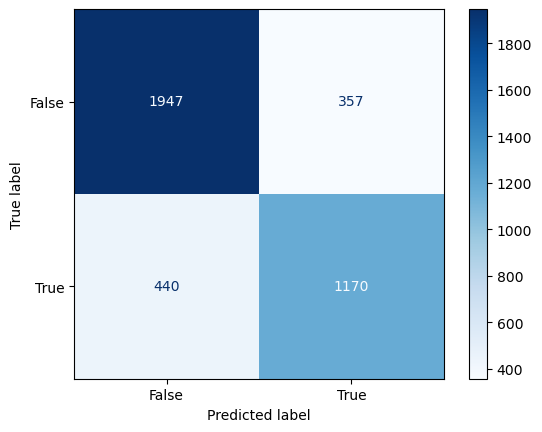

>> RF


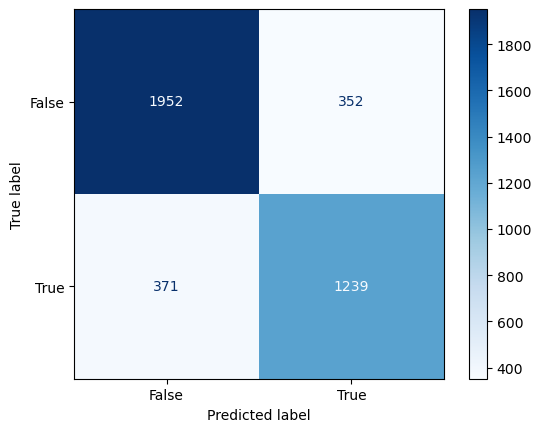

>> AB


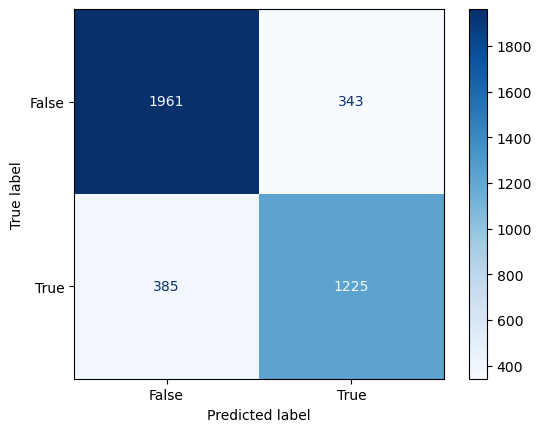

>> GB


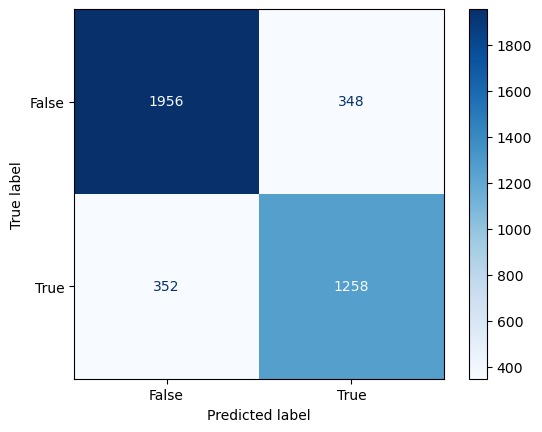

In [64]:
# c) 

X = pd.read_csv("acsincome_ca_features_without_sex.csv")
y = pd.read_csv("acsincome_ca_labels.csv")

# shuffle the data, select 10%
X, y = shuffle(X, y, random_state=1)

num_samples = int(len(X)*0.1)
X, y = X[:num_samples], y[:num_samples]

# Standrize and split the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,y, test_size=0.2)
# we kept the same best models as before with the same hyperparameters, and we create new model instances of them
models = [SVR(C= 0.1, kernel= 'rbf')]
models.append( RandomForestClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split= 2, n_estimators =  100))
models.append(AdaBoostClassifier(learning_rate= 1.0, n_estimators=200))
models.append(GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200))

for index, model in enumerate(models):
    print(">> {}".format(names[index]))
    model.fit(X_train_new,y_train_new)
    y_pred_new = model.predict(X_test_new)
    plot_confusion_matrix(confusion_matrix(y_test_new, y_pred_new.round()))

In [68]:
# e)
for index, best_model in enumerate(best_estimators):
    print(">> {}".format(names[index]))
    
    # selection_rate : Pour le training
    print(">> Train set - selection_rate :")
    y_pred_train = best_model.predict(X_train)
    metric_frame = MetricFrame(metrics= selection_rate, y_true=y_train, y_pred=y_pred_train, sensitive_features=X_train['RAC1P'])
    print(metric_frame.by_group)
    
    # selection_rate : Pour le test
    print(">> Test set - selection_rate :")
    y_pred_test = best_model.predict(X_test)
    metric_frame = MetricFrame(metrics= selection_rate, y_true=y_test, y_pred=y_pred_test, sensitive_features=X_test['RAC1P'])
    print(metric_frame.by_group)

    
    # equalized_odds_difference : Pour le training
    print(">> Train set - equalized_odds_difference :")
    y_pred_train = best_model.predict(X_train)
    y_true_mapped = np.array(y_train, dtype=int)
    y_pred_mapped = np.array(y_pred_train, dtype=int)
    metric_parity = equalized_odds_difference(y_true=y_true_mapped, y_pred=y_pred_mapped, sensitive_features=X_train['RAC1P'],method='between_groups')
    print(metric_parity)

    # equalized_odds_difference : Pour le test
    print(">> Test set - equalized_odds_difference :")
    y_pred_test = best_model.predict(X_test)
    y_true_mapped_ = np.array(y_test, dtype=int)
    y_pred_mapped_ = np.array(y_pred_test, dtype=int)
    metric_parity = equalized_odds_difference(y_true=y_true_mapped_, y_pred=y_pred_mapped_, sensitive_features=X_test['RAC1P'],method='between_groups')
    print(metric_parity)

>> SVM
>> Train set - selection_rate :


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- RAC1P


In [67]:
# On garde les memes modèles qu'avant avec les memes paramètres juste mnt on va faire des nouvelles instances de modelès pour fair l'apprentissage
models = [SVR(C= 0.1, kernel= 'rbf')]
models.append(RandomForestClassifier(max_depth = 10, min_samples_leaf = 4, min_samples_split= 10, n_estimators =  200))
models.append(AdaBoostClassifier(learning_rate= 1.0, n_estimators=200))
models.append(GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100))

# Enlever la feature RAC1P du dataset
X_train.drop(columns=['RAC1P'], inplace=True)
X_test.drop(columns=['RAC1P'], inplace=True)
for index, model in enumerate(models):
    print(">> {}".format(names[index]))
    model.fit(X_train,y_train)
    y_pred_ = model.predict(X_test)
    plot_confusion_matrix(confusion_matrix(y_test, y_pred_.round()))

KeyError: "['RAC1P'] not found in axis"